# ENGLISH R1A: Chinatown and the Culture of Exclusion
**Instructor: Amy Lee**

**Developers: Michaela Palmer, Maya Shen, Cynthia Leu, Chris Cheung**

**FPF 2017**

Welcome to lab! Please read this lab in its entirety, as the analysis will make a lot more sense with the background context provided.
This lab is intended to be a hands-on introduction to data science as it can be applied to Chinatown demographics and analyzing primary texts.

The goal is to understand the evolution of Chinatowns due to outside forces such as globalization, immigration, and urbanization.

## What this lab will cover
* Running Jupyter Notebooks
* Data Analysis of Chinatowns' demographics
* Visualization & Interpretation

## What you need to do
* Read the content, complete the questions
* Analyze the data
* Submit the assignment


# 1. Running Jupyter Notebooks

You are currently working in a Jupyter Notebook. A Notebook allows text and code to be combined into one document. Each rectangular section of a notebook is called a "cell." There are two types of cells in this notebook: text cells and code cells. 

Jupyter allows you to run simulations and regressions in real time. To do this, select a code cell, and click the "run cell" button at the top that looks like ▶| to confirm any changes. Alternatively, you can hold down the `shift` key and then press `return` or `enter`.

In the following simulations, anytime you see `In [ ]` you should click the "run cell" button to see output. **If you get an error message after running a cell, go back to the beginning of the lab and make sure that every previous code cell has been run.**


# Part 0: Introduction to Python and Jupyter Notebooks: <a id='jupyter'></a>

## 1. Cells, Arithmetic, and Code
In a notebook, each rectangle containing text or code is called a *cell*.

Cells (like this one) can be edited by double-clicking on them. This cell is a text cell, written in a simple format called [Markdown](http://daringfireball.net/projects/markdown/syntax) to add formatting and section headings.  You don't need to worry about Markdown today, but it's a pretty fun+easy tool to learn.

After you edit a cell, click the "run cell" button at the top that looks like ▶| to confirm any changes. (Try not to delete the instructions.) You can also press `SHIFT-ENTER` to run any cell or progress from one cell to the next.

Other cells contain code in the Python programming language.  Running a code cell will execute all of the code it contains.

Try running this cell:

In [ ]:
print("Hello, World!")

We will now quickly go through some very basic functionality of Python, which we'll be using throughout the rest of this notebook.

### 1.1 Arithmetic
Quantitative information arises everywhere in data science. In addition to representing commands to `print` out lines, expressions can represent numbers and methods of combining numbers. 

The expression `3.2500` evaluates to the number 3.25. (Run the cell and see.)

In [ ]:
3.2500

We don't necessarily always need to say "`print`", because Jupyter always prints the last line in a code cell. If you want to print more than one line, though, do specify "`print`".

In [ ]:
print(3)
4
5

Many basic arithmetic operations are built in to Python, like `*` (multiplication), `+` (addition), `-` (subtraction), and `/` (division). There are many others, which you can find information about [here](http://www.inferentialthinking.com/chapters/03/1/expressions.html). Use parenthesis to specify the order of operations, which act according to PEMDAS, just as you may have learned in school. Use parentheses for a happy new year!

In [ ]:
1 + (6 * 5 - (6 * 3)) ** 2 * (( 2 ** 3 ) / 4 * 7)

### 1.2 Variables

We sometimes want to work with the result of some computation more than once. To be able to do that without repeating code everywhere we want to use it, we can store it in a variable with *assignment statements*, which have the variable name on the left, an equals sign, and the expression to be evaluated and stored on the right. In the cell below, `(3 * 11 + 5) / 2 - 9` evaluates to 10, and gets stored in the variable `result`.

In [ ]:
result = (3 * 11 + 5) / 2 - 9

In [ ]:
result 

## 2. Functions

One important form of an expression is the call expression, which first names a function and then describes its arguments. The function returns some value, based on its arguments. Some important mathematical functions are:

| Function | Description                                                   |
|----------|---------------------------------------------------------------|
| `abs`      | Returns the absolute value of its argument                    |
| `max`      | Returns the maximum of all its arguments                      |
| `min`      | Returns the minimum of all its arguments                      |
| `round`    | Round its argument to the nearest integer                     |

Here are two call expressions that both evaluate to 3

```python
abs(2 - 5)
max(round(2.8), min(pow(2, 10), -1 * pow(2, 10)))
```

These function calls first evaluate the expressions in the arguments (inside the parentheses), then evaluate the function on the results. `abs(2-5)` evaluates first to `abs(3)`, then returns `3`.

A **statement** is a whole line of code.  Some statements are just expressions, like the examples above, that can be broken down into its subexpressions which get evaluated individually before evaluating the statement as a whole.


### 2.1 Calling functions

The most common way to combine or manipulate values in Python is by calling functions. Python comes with many built-in functions that perform common operations.

For example, the `abs` function takes a single number as its argument and returns the absolute value of that number.  The absolute value of a number is its distance from 0 on the number line, so `abs(5)` is 5 and `abs(-5)` is also 5.

In [ ]:
abs(5)

In [ ]:
abs(-5)

Functions can be called as above, putting the argument in parentheses at the end, or by using "dot notation", and calling the function after finding the arguments, as in the cell immediately below.

In [ ]:
nums = [1, 2, 5]  # a list of items, in this case, numbers

In [ ]:
nums.reverse()  # reverses the item order
nums

# Part 1: Exploring Demographic Data: <a id='jupyter'></a>

## 1.1 Importing Modules

First, we need to import libraries so that we are able to call the functions from within. We are going to use these functions to manipulate data tables and conduct math operations in our analysis. Run the code cell below to import these modules.

In [1]:
%%capture
!python -m spacy download en
!pip install --no-cache-dir wordcloud
!pip install --no-cache-dir -U -q folium
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import *
%matplotlib inline
import folium
import pandas as pd
from IPython.display import HTML, display, IFrame
from folium import plugins
import spacy
from wordcloud import WordCloud
import geojson

ModuleNotFoundError: No module named 'geojson'

## 1.2 Reading Data

Now it's time to work with tables and explore some real data. A Table is just like how we made a list above with make_array, but for all the rows in a table.
<p>First, let's load in all our of decennial San Francisco Chinatown census data acquired from an online domain called Social Explorer.
    
### 2010-1015

In [ ]:
df = pd.read_csv('data/2010-2015.csv')
df['FIPS'] = '0' + df['FIPS'].astype(str)
df['Asian_percentage'] = df['Asian'] / df['Population']
df.head()

In [ ]:
df.describe()

In [ ]:
df.corr()

In [ ]:
df_2015 = df[df['Year'] == 2015]

In [ ]:
def choro_column(df, column):
    sf_2010 = geojson.load(open("data/2010-sf.geojson"))
    tracts = folium.features.GeoJson(sf_2010)
    threshold_scale = np.linspace(min(df[column]), max(df[column]), 6, dtype=float).tolist()

    mapa = folium.Map(location=(37.7793784, -122.4063879), zoom_start=12)
    mapa.choropleth(geo_data=sf_2010,
                    data=df,
                    columns=['FIPS', column],
                    fill_color='YlOrRd',
                    key_on='feature.properties.GEOID10',
                    threshold_scale=threshold_scale)
    return mapa

choro_column(df_2015, 'Asian_percentage')

### 1940-2010

In [ ]:
df_historical = pd.read_csv('data/process.csv')
df_historical['Other'] = df_historical['Total Population'] - df_historical['White'] - df_historical['Black']
df_historical

In [ ]:
df_historical.groupby('Year')['Total Population'].mean()

In [ ]:
df_historical.groupby('Year')['Total Population'].mean().plot()

In [ ]:
df_historical.groupby('Year')['White'].mean()

In [ ]:
df_historical.groupby('Year')['White'].mean().plot()

In [ ]:
df_historical.groupby('Year')['Black'].mean()

In [ ]:
df_historical.groupby('Year')['Black'].mean().plot()

In [ ]:
df_historical.groupby('Year')['Other'].mean()

In [ ]:
df_historical.groupby('Year')['Other'].mean().plot()

Now it's time to work with tables and explore some real data. A Table is just like how we made a list above with make_array, but for all the rows in a table.
<p>First, let's load in all our of decennial San Francisco Chinatown census data acquired from an online domain called Social Explorer.

In [ ]:
# load in all of the data
sf_1940 = Table.read_table('data/sf_1940.csv')
sf_1950 = Table.read_table('data/sf_1950.csv')
sf_1960 = Table.read_table('data/sf_1960.csv')
sf_1970 = Table.read_table('data/sf_1970.csv')
sf_1980 = Table.read_table('data/sf_1980.csv')
sf_1990 = Table.read_table('data/sf_1990.csv')
sf_2000 = Table.read_table('data/sf_2000.csv')
sf_2010 = Table.read_table('data/sf_2010.csv')

Let's take a look at one of these tables by running this block of code:

In [ ]:
sf_1970

Woah! That's a lot of data and a lot of data that we don't need. In each dataset there are a lot of columns with datasets that we aren't interested in. We need to extract the valuable pieces of data from each year as well as omit the rows that don't provide us with useful information. Since we are analyzing the changing demographics of Chinatown, we need to extract the population data by selecting the relevant columns from each table. Analyzing data from the U.S. Census can be a little tricky because each year the datasets they acquire and the survey questions they ask are a little different. As a result, some years we get a number as specific as the population of Chinese in a given tract, and in other years the most specific information available to us is the "Nonwhite" population. We have to work with what we have to get an accurate as possible idea of the population of the Chinese in Chinatown.

In [ ]:
sf_1940_pop = sf_1940.select('Full Name', 'Total Population', 'White', 'Black', 'Other')
sf_1940_pop = sf_1940_pop.take(range(1, sf_1940_pop.num_rows))
sf_1940_pop

Now this table is a lot more readable, with the specific columns that we want. Now that you have an idea of how to clean the data, we'll do the rest for you.

In [ ]:
sf_1950_pop = sf_1950.select('Full Name', 'Total Population', 'White', 'Black', 'Other')
sf_1950_pop = sf_1950_pop.take(range(1, sf_1950_pop.num_rows))
sf_1960_pop = sf_1960.select('Qualified geography name', 'Total Population', 'Total Population: White', 
                             'Total Population: Black', 'Total Population: Other Race')
sf_1960_pop = sf_1960_pop.take(range(1, sf_1960_pop.num_rows))
sf_1970_pop = sf_1970.select('Qualifying Name', 'Total Population', 'White', 'Black', 'Some Other Race', 
                             'Count of Persons of Foreign Stock',
                             'Count of Persons of Foreign Stock: Native (of foreign or mixed parentage)', 
                             'Count of Persons of Foreign Stock: Native (of foreign or mixed parentage): China', 
                             'Count of Persons of Foreign Stock: Foreign born', 
                             'Count of Persons of Foreign Stock: Foreign born: China')
sf_1970_pop = sf_1970_pop.take(range(1, sf_1970_pop.num_rows))
sf_1980_pop = sf_1980.select('Qualifying Name', 'Total Population', 'Total Population: White', 
                             'Total Population: Black', 'Total Population: Asian and Pacific Islander')
sf_1980_pop = sf_1980_pop.take(range(1, sf_1980_pop.num_rows))
sf_1990_pop = sf_1990.select('Qualifying Name', 'Total Population', 'Persons: White', 
                             'Persons: Black', 'Persons: Asian or Pacific Islander')
sf_1990_pop = sf_1990_pop.take(range(1, sf_1990_pop.num_rows))
sf_2000_pop = sf_2000.select('Qualifying Name', 'Total Population', 'White Alone', 'Black or African American Alone', 
                             'Asian Alone', 'Chinese, except Taiwanese')
sf_2000_pop = sf_2000_pop.take(range(1, sf_2000_pop.num_rows))
sf_2010_pop = sf_2010.select('Qualifying Name', 'Total Population', 'Total population: White alone', 
                             'Total population: Black or African American alone', 'Total population: Asian alone', 
                             'Total Asian with one Asian category only: Chinese (except Taiwanese)')
sf_2010_pop = sf_2010_pop.take(range(1, sf_2010_pop.num_rows))

In [ ]:
boston = Table.read_table('data/Boston Chinatown Population.csv')
boston

### Official map of Chinatown in San Francisco - 1855
#### Prepared under the supervision of the special committee of the Board of Supervisors. July 1885.

![image](data/PJM_1093_01.jpg)


This map reflects the pervasive bias against the Chinese in California and in turn further fostered the hysteria. It was published as part of an official report of a Special Committee established by the San Francisco Board of Supervisors "on the Condition of the Chinese Quarter." The Report resulted from a dramatic increase in hostility to the Chinese, particularly because many Chinese laborers had been driven out of other Western states by vigilantes and sought safety in San Francisco (Shah 2001, 37).
<p>The substance and tone of the Report is best illustrated by a few excerpts: "The general aspect of the streets and habitations was filthy in the extreme, . . . a slumbering pest, likely at any time to generate and spread disease, . . . a constant source of danger . . . , the filthiest spot inhabited by men, women and children on the American continent." (Report 4-5). "The Chinese brought here with them and have successfully maintained and perpetuated the grossest habits of bestiality practiced by the human race." (Ibid. 38).
<p>The map highlights the Committee's points, particularly the pervasiveness of gambling, prostitution and opium use. It shows the occupancy of the street floor of every building in Chinatown, color coded to show: General Chinese Occupancy|Chinese Gambling Houses|Chinese Prostitution|Chinese Opium Resorts|Chinese Joss Houses|and White Prostitution.
The Report concludes with a recommendation that the Chinese be driven out of the City by stern enforcement of the law: "compulsory obedience to our laws [is] necessarily obnoxious and revolting to the Chinese|and the more rigidly this enforcement is insisted upon and carried out the less endurable will existence be to them here, the less attractive will life be to them in California. Fewer will come and fewer will remain. . . . Scatter them by such a policy as this to other States . . . ." (Ibid. 67-68)

# 2. Analyzing Demographics
In this section, we will examine some of the factors that influence population growth and how they are changing the landscape of Chinatowns across the U.S.

In [ ]:
SF_COORDINATES = (37.79937840, -122.40638790) # create empty map zoomed in AOI
map = folium.Map(location=SF_COORDINATES, zoom_start=13).save("map.html")
IFrame('map.html', width=700, height=400)

# need to bind pop data to boundaries

SF

We'll first examine the Asian percent population change over the years in Chinatown. To do this, we have to first aggregate all of the Census tract data from each year onto a single table.

In [ ]:
sf_total_pop = Table().with_columns(
    'Year', make_array(1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010),
    'Total Population', make_array(sum([int(i) for i in sf_1940_pop.column(1)]), sum([int(i) for i in sf_1950_pop.column(1)]), sum([int(i) for i in sf_1960_pop.column(1)]), sum([int(i) for i in sf_1970_pop.column(1)]), sum([int(i) for i in sf_1980_pop.column(1)]), sum([int(i) for i in sf_1990_pop.column(1)]), sum([int(i) for i in sf_2000_pop.column(1)]), sum([int(i) for i in sf_2010_pop.column(1)]))
    
)
sf_total_pop

MANHATTAN

# 3. Reading Primary Texts


We're going to further analyze some of the poems we have been discussing written by Chinese immigrants on Angel Island. 
<p>Run the following cell to import the poems from a .txt file.

In [2]:
with open('data/islandpoetry1_22.txt', "r") as f:
    raw = f.read()
raw

'The sea-scape resembles lichen twisting and\nturning for a thousand li\nThere is no shore to land and it is difficult to\nwalk.\nWith a gentle breeze I arrived at the city\nthinking all would be so.\nAt ease, how was one to know he was to live in a\nwooden building?\n\nBecause my house had bare walls, I began\nrushing all about.\nThe waves are happy, laughing "Ha-ha!"\nWhen I arrived on Island, I heard I was\nforbidden to land.\nI could do nothing but frown and feel angry\nat heaven.\n\nAs a rule, a person is twenty before he starts\nmaking a living.\nFamily circumstances have forced me to\nexperience wind and dust.\nThe heartless months and years seem bent on\ndefeating me.\nIt is a pity that time quickly ages one.\n\nThe gold and silver of America is very\nappealing.\nJabbing an awl into the thigh in search of\nglory,\nI embarked on the journey.\nNot only are my one-thousand pieces of gold\nalready depleted, but\nMy countenance is blackened. It is surely for\nthe sake of the family.

We're interested in which words appear the most often in our set of poems. It's pretty hard to read or see much in this form. We'll coming back to the topic of what words are the most common with actual numbers a bit later but for now, run the following cell to generate two interesting visualizations of the most common words (minus those such as "the", "a", etc.). hi

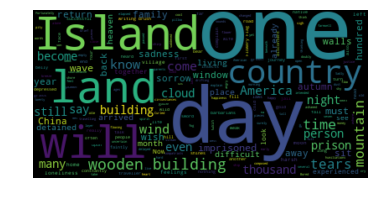

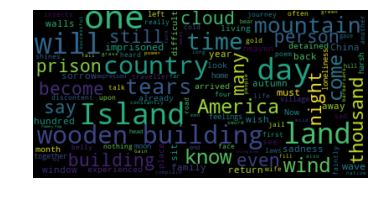

In [3]:
wordcloud = WordCloud().generate(raw)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(raw)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Oops, it seems we've forgotten just how many poems we have in our set. Luckily we have a quick way of finding out! Each "\n" in the display of the poem text indicates a line break. It turns out that each poem is separated by an empty line, a.k.a. two line breaks or "\n"'s.

In [4]:
num_poems = len(raw.split("\n\n"))
num_poems

49

We can also use this idea to calculate the number of characters in each poem.

In [5]:
num_char_per_poem = [len(p) for p in raw.split("\n\n")]
print(num_char_per_poem)

[259, 212, 227, 262, 306, 233, 654, 260, 488, 550, 206, 167, 331, 325, 128, 203, 196, 251, 221, 250, 488, 201, 206, 237, 344, 243, 442, 345, 507, 474, 382, 465, 624, 444, 302, 399, 230, 505, 268, 437, 288, 226, 532, 116, 487, 254, 279, 263, 233]


This is interesting but seems like just a long list of numbers. What about the average number of characters per poem?

In [6]:
avg_char = np.mean(num_char_per_poem)
avg_char

325.51020408163265

Let's look at it in histogram form to get a better idea of our data.

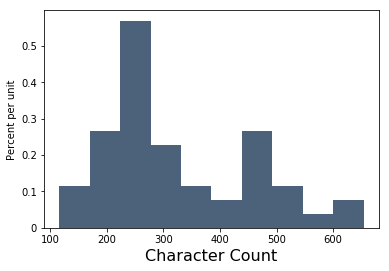

In [7]:
Table().with_columns("Character Count", np.asarray(num_char_per_poem)).hist()

We can also use "\n" to look at enjambment. Let's calculate the proportion of lines that are enjambed out of the total number of lines per poem. 

In [8]:
from string import punctuation

poems = raw.split("\n\n")

all_poems_enjambment = []
for p in poems:
    lines = p.split("\n")
    enjambment = 0
    for l in lines:
        try:
            if l[-1] in punctuation:
                pass
            else:
                enjambment += 1
        except:
            pass
    enj = enjambment/len(lines)
    all_poems_enjambment.append(enj)

print(all_poems_enjambment)

[0.625, 0.42857142857142855, 0.42857142857142855, 0.5555555555555556, 0.1111111111111111, 0.5, 0.45, 0.5, 0.4666666666666667, 0.4375, 0.42857142857142855, 0.2, 0.25, 0.2222222222222222, 0.0, 0.3333333333333333, 0.3333333333333333, 0.5, 0.3333333333333333, 0.2857142857142857, 0.4, 0.42857142857142855, 0.42857142857142855, 0.5, 0.2, 0.4444444444444444, 0.42857142857142855, 0.2727272727272727, 0.5, 0.35714285714285715, 0.3333333333333333, 0.5, 0.3157894736842105, 0.35714285714285715, 0.5, 0.5384615384615384, 0.5, 0.5, 0.375, 0.4666666666666667, 0.5555555555555556, 0.5, 0.47058823529411764, 0.5, 0.5, 0.5, 0.5, 0.5, 0.4444444444444444]


Once again, what about the average?

In [9]:
np.mean(all_poems_enjambment)

0.41237745084889205

Let's now return to the question of the words that appear the most frequently in these 49 poems. First we have to use spaCy, an open-source software library for Natural Language Processing (NLP), to parse through the text and replace all the "\n"'s with spaces.

In [10]:
nlp = spacy.load('en', parser=False)
parsed_text = nlp(raw.replace("\n", " "))
parsed_text



    Only loading the 'en' tokenizer.



The sea-scape resembles lichen twisting and turning for a thousand li There is no shore to land and it is difficult to walk. With a gentle breeze I arrived at the city thinking all would be so. At ease, how was one to know he was to live in a wooden building?  Because my house had bare walls, I began rushing all about. The waves are happy, laughing "Ha-ha!" When I arrived on Island, I heard I was forbidden to land. I could do nothing but frown and feel angry at heaven.  As a rule, a person is twenty before he starts making a living. Family circumstances have forced me to experience wind and dust. The heartless months and years seem bent on defeating me. It is a pity that time quickly ages one.  The gold and silver of America is very appealing. Jabbing an awl into the thigh in search of glory, I embarked on the journey. Not only are my one-thousand pieces of gold already depleted, but My countenance is blackened. It is surely for the sake of the family.  Four days before the Qiqiao Fest

We can separate all the words/symbols and put them in a table.

In [11]:
toks_tab = Table()
toks_tab.append_column(label="Word", values=[word.text for word in parsed_text])
toks_tab.show()

Word
The
sea
-
scape
resembles
lichen
twisting
and
turning
for


In [12]:
toks_tab.append_column(label="POS", values=[word.pos_ for word in parsed_text])
toks_tab.show()

Word,POS
The,
sea,
-,
scape,
resembles,
lichen,
twisting,
and,
turning,
for,


Now let's create a new table with even more columns using the "tablefy" function below.

In [13]:
def tablefy(parsed_text):
    toks_tab = Table()
    toks_tab.append_column(label="Word", values=[word.text for word in parsed_text])
    toks_tab.append_column(label="POS", values=[word.pos_ for word in parsed_text])
    toks_tab.append_column(label="Lemma", values=[word.lemma_ for word in parsed_text])
    toks_tab.append_column(label="Stop Word", values=[word.is_stop for word in parsed_text])
    toks_tab.append_column(label="Punctuation", values=[word.is_punct for word in parsed_text])
    toks_tab.append_column(label="Space", values=[word.is_space for word in parsed_text])
    toks_tab.append_column(label="Number", values=[word.like_num for word in parsed_text])
    toks_tab.append_column(label="OOV", values=[word.is_oov for word in parsed_text])
    toks_tab.append_column(label="Dependency", values=[word.dep_ for word in parsed_text])
    return toks_tab

In [14]:
tablefy(parsed_text).show()

Word,POS,Lemma,Stop Word,Punctuation,Space,Number,OOV,Dependency
The,,,True,False,False,False,True,
sea,,,False,False,False,False,True,
-,,,False,True,False,False,True,
scape,,,False,False,False,False,True,
resembles,,,False,False,False,False,True,
lichen,,,False,False,False,False,True,
twisting,,,False,False,False,False,True,
and,,,True,False,False,False,True,
turning,,,False,False,False,False,True,
for,,,True,False,False,False,True,


Next, let's look at the frequency of words. However, we want to get rid of words such as "the" and "and" (stop words), punctuation, and spaces. We can do this by selecting rows that are not stop words, punctuation, or spaces and then sorting by word!

In [15]:
word_counts = tablefy(parsed_text).where("Stop Word", are.equal_to(False)).where(
    "Punctuation", are.equal_to(False)).where(
    "Space", are.equal_to(False)).group("Word").sort("count",descending=True)
word_counts

Word,count
building,15
land,12
wooden,11
Island,11
day,10
country,10
tears,8
's,8
know,7
America,7


However, we see the words "sad" and "sadness" - it seems strange to separate them. It turns out that these words are part of the same "lexeme", or a unit of meaning. For example, "run", "runs", "ran", and "running" are all part of the same lexeme with the lemma sad. Lemmas are another column in our above table! Nice!

In [16]:
lemma_counts = tablefy(parsed_text).where("Stop Word", are.equal_to(False)).where(
    "Punctuation", are.equal_to(False)).where(
    "Space", are.equal_to(False)).group("Lemma").sort("count",descending=True)
lemma_counts

Lemma,count
,1327
because,2


Now let's look at how many words there are of each part of speech.

In [17]:
pos_counts = tablefy(parsed_text).where("Stop Word", are.equal_to(False)).where(
    "Punctuation", are.equal_to(False)).where(
    "Space", are.equal_to(False)).group("POS").sort("count",descending=True)
pos_counts

POS,count
,1329


We can also look at the proportions of them out of all the words!

In [18]:
for i in np.arange(pos_counts.num_rows):
    pos = pos_counts.column("POS").item(i)
    count = pos_counts.column("count").item(i)
    total = np.sum(pos_counts.column("count"))
    proportion = str(count / total)
    print(pos + " proportion: " + proportion)

 proportion: 1.0


If we're interested in words' relations with each other, we can look at words that are next to each other. The function below returns the word following the first instance of the word you search for in the specified source.

In [19]:
def nextword(word, source):
    for i, w in enumerate(source):
        if w == word:
            return source[i+1]

Mess around a bit with this function! Change the "word" argument.

In [20]:
split_txt = raw.split()
#Change the target or "home" to other words!
nextword("home", split_txt)

'elicits'

We are specifically interested in the word "I" and the words that poets use in succession. Let's make an array of all the words that come after it in these poems. For easier viewing, the phrases have been printed out. What do you notice?

In [22]:
one_after_i = make_array()
for i, w in enumerate(split_txt):
    if w == "I":
        one_after_i = np.append(one_after_i, split_txt[i+1])
for i in one_after_i:
    print("I " + i)

I arrived
I began
I arrived
I heard
I was
I could
I embarked
I boarded
I am
I have
I suffered
I am
I sigh
I had
I took
I ate
I arrived
I thought
I could
I to
I would
I only
I can
I willingly
I intended
I have
I used
I immediately
I have
I am
I look
I wish
I just
I had
I think
I had
I resolved
I am
I heard,
I composed
I lie
I get
I count
I have
I feel
I sought
I see
I can
I gaze
I listen
I dissipate
I met
I cannot
I sit
I have
I wish
I could
I confide
I rely
I bow
I can
I can
I cannot
I can
I have
I cannot
I threw
I have
I constantly
I dreamed
I have
I am
I will
I cannot
I be
I please?
I am
I must
I must
I bear
I look
I am
I gaze
I sit
I can
I return
I came
I will
I will
I am
I threw
I bought
I opened
I reminisce
I have
I lean
I am
I grieve
I say?
I have
I am
I dare
I left
I gaze
I would
I beat
I think
I respectfully
I am
I become
I will
I level
I am
I should
I thoroughly
I cannot
I also


Above we have only shown the next word, what about the next two words? Does this give you any new insight?

In [23]:
two_after_i = make_array()
for i, w in enumerate(split_txt):
    if w == "I":
        two_after_i = np.append(two_after_i, split_txt[i+1] + " " + split_txt[i+2])
for i in two_after_i:
    print("I " + i)

I arrived at
I began rushing
I arrived on
I heard I
I was forbidden
I could do
I embarked on
I boarded the
I am at
I have yet
I suffered misery
I am not
I sigh because
I had intended
I took passage
I ate wind
I arrived safely
I thought I
I could land
I to know
I would become
I only wish
I can land
I willingly became
I intended to
I have not
I used to
I immediately raised
I have experienced
I am subject
I look up
I wish to
I just write
I had a
I think back
I had not
I resolved to
I am still
I heard, faintly,
I composed a
I lie stiff
I get up
I count the
I have not
I feel embarrassed.
I sought the
I see my
I can only
I gaze at
I listen to
I dissipate my
I met with
I cannot bear
I sit passively
I have a
I wish I
I could travel
I confide my
I rely solely
I bow my
I can do.
I can do
I cannot extend
I can only
I have infinite
I cannot fly
I threw away
I have no
I constantly pace
I dreamed of
I have run
I am allowed
I will toss
I cannot come
I be allowed
I please? There
I am rid
I must rememb

Try doing some exploring of your own! If you're feeling stuck, feel free to copy and edit code from above.

In [ ]:
#Write your own code here!